# Loading the dataset

import essential libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:

df = pd.read_csv("E-commerce Customer Behavior.csv")
print(df.head())

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

# Data Cleaning

In [33]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None
       Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   350.000000  350

In [34]:
print(df.isnull().sum())
#satisfaction level has 2 null examples..we can replace them with mode value of the column
print(f"\nEarlier null values in Satisfaction Level column:{df['Satisfaction Level'].isnull().sum()}")
mode_value = df['Satisfaction Level'].mode()[0]
print("\nMost common value in Satisfaction Level Column:", mode_value)
df.fillna({'Satisfaction Level': mode_value}, inplace=True)#instead of df['Satisfaction Level'].fillna(mode_value, inplace=True)
print(f"\nAfter replacing null values, no of nullvalues in Satisfaction Level column:{df['Satisfaction Level'].isnull().sum()}")



Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

Earlier null values in Satisfaction Level column:2

Most common value in Satisfaction Level Column: Satisfied

After replacing null values, no of nullvalues in Satisfaction Level column:0


# Data preprocessing

Identify the categorical columns and then encode them

In [35]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Gender', 'City', 'Membership Type', 'Satisfaction Level']


In [36]:
#better approach to find categorical data..cuz some times int types are also categorcal
for col in df.columns:
    if df[col].nunique() < 10:
        print(f"{col} - unique values: {df[col].unique()}")


Gender - unique values: ['Female' 'Male']
City - unique values: ['New York' 'Los Angeles' 'Chicago' 'San Francisco' 'Miami' 'Houston']
Membership Type - unique values: ['Gold' 'Silver' 'Bronze']
Discount Applied - unique values: [ True False]
Satisfaction Level - unique values: ['Satisfied' 'Neutral' 'Unsatisfied']


we can use label encoding for ordered categories

binary encoding for boolean values

And one-hot encoding for nominal categories

In [37]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Label encode ordered categories
label_cols = ['Membership Type', 'Satisfaction Level']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoders for later use (e.g. prediction)

# Convert Boolean column to integer
df_encoded['Discount Applied'] = df_encoded['Discount Applied'].astype(int)

# One-hot encode nominal categories
df_encoded = pd.get_dummies(df_encoded, columns=['Gender', 'City'], drop_first=True)

In [45]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [50]:
df_encoded.columns

Index(['Customer ID', 'Age', 'Membership Type', 'Total Spend',
       'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level', 'Gender_Male',
       'City_Houston', 'City_Los Angeles', 'City_Miami', 'City_New York',
       'City_San Francisco'],
      dtype='object')

Scaling/Normalization using StandardScaler

In [52]:
#customer id not needed
df_encoded.drop(columns=['Customer ID'], inplace=True, errors='ignore')


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)

In [55]:
df_scaled.describe()

,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
count,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,350.000000,3.500000e+02,3.500000e+02,350.000000,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02
mean,2.023778e-16,-2.283887e-17,1.126083e-16,8.390114e-17,-7.765217e-16,0.000000,1.015061e-16,-1.218073e-16,0.000000,9.389315e-17,-2.220446e-17,9.198991e-17,-2.474211e-17,9.262432e-17
std,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432,1.001432e+00,1.001432e+00,1.001432,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00
min,-1.561939e+00,-1.229130e+00,-1.202026e+00,-1.349384e+00,-1.758026e+00,-1.000000,-1.310468e+00,-1.285682e+00,-1.000000,-4.456794e-01,-4.502767e-01,-4.456794e-01,-4.502767e-01,-4.456794e-01
25%,-7.395565e-01,-1.229130e+00,-9.497723e-01,-8.674609e-01,-8.955237e-01,-1.000000,-8.634271e-01,-1.285682e+00,-1.000000,-4.456794e-01,-4.502767e-01,-4.456794e-01,-4.502767e-01,-4.456794e-01
50%,-2.255677e-01,-3.501795e-03,-1.941182e-01,-1.445768e-01,1.394789e-01,0.000000,-2.673729e-01,-3.223157e-02,0.000000,-4.456794e-01,-4.502767e-01,-4.456794e-01,-4.502767e-01,-4.456794e-01
75%,6.996122e-01,1.222126e+00,8.718740e-01,5.783073e-01,8.294807e-01,1.000000,8.502287e-01,1.221219e+00,1.000000,-4.456794e-01,-4.502767e-01,-4.456794e-01,-4.502767e-01,-4.456794e-01
max,1.933185e+00,1.222126e+00,1.866228e+00,2.024075e+00,1.519482e+00,1.000000,2.712898e+00,1.221219e+00,1.000000,2.243765e+00,2.220856e+00,2.243765e+00,2.220856e+00,2.243765e+00


# Clustering

Step 1: Using **Elbow method** to find the optimal number of Clusters
 which measures the Within-Cluster-Sum of Squared Errors (WCSS) for different values of K (number of clusters).

 Equivalent to model evaluation

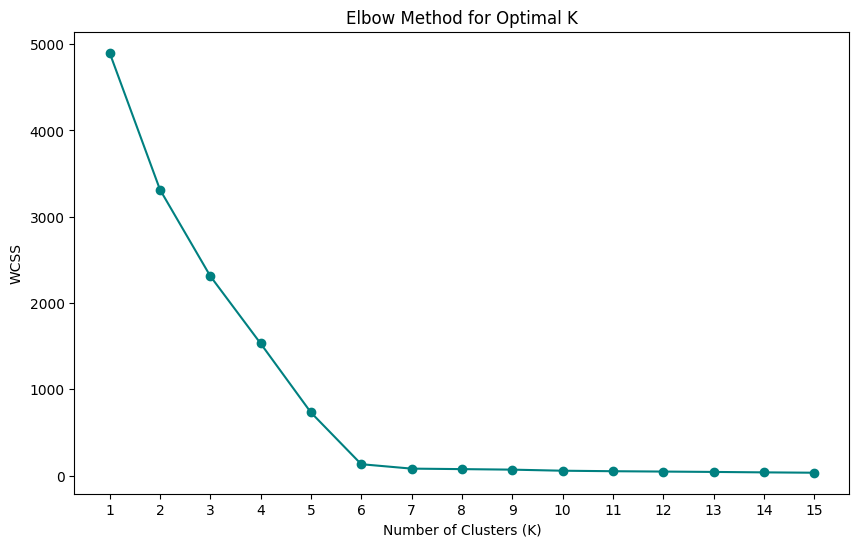

In [57]:
from sklearn.cluster import KMeans
wcss = []

# Test K values from 1 to 15
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='-', color='teal')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 16))
plt.show()

6 is the optimal number of clusters

Step2: clustering via Kmean algorithm

In [58]:
# Train the final model with the optimal number of clusters
kmeans_final = KMeans(n_clusters=6, random_state=42)
df_scaled['Cluster'] = kmeans_final.fit_predict(df_scaled)
"""
a. fit()
Finds the 6 cluster centroids based on the scaled data (df_scaled).
Adjusts the cluster centroids iteratively to minimize the within-cluster sum of squared errors (WCSS).
Learns the cluster structure of your data.

b. predict()
Assigns each data point in df_scaled to the nearest cluster.
Returns an array of cluster labels indicating which cluster each data point belongs to.

"""

# Add cluster labels back to the original encoded DataFrame for context
df_encoded['Cluster'] = df_scaled['Cluster']

Step3: examine the cluster distribution via countplot and scatter plot

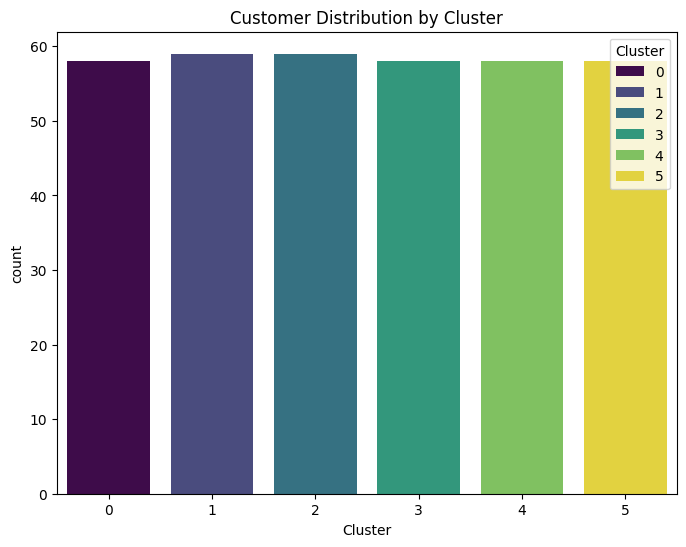

In [64]:
# Countplot to visualize the distribution of clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_encoded, hue='Cluster',palette='viridis')

plt.title('Customer Distribution by Cluster')
plt.show()

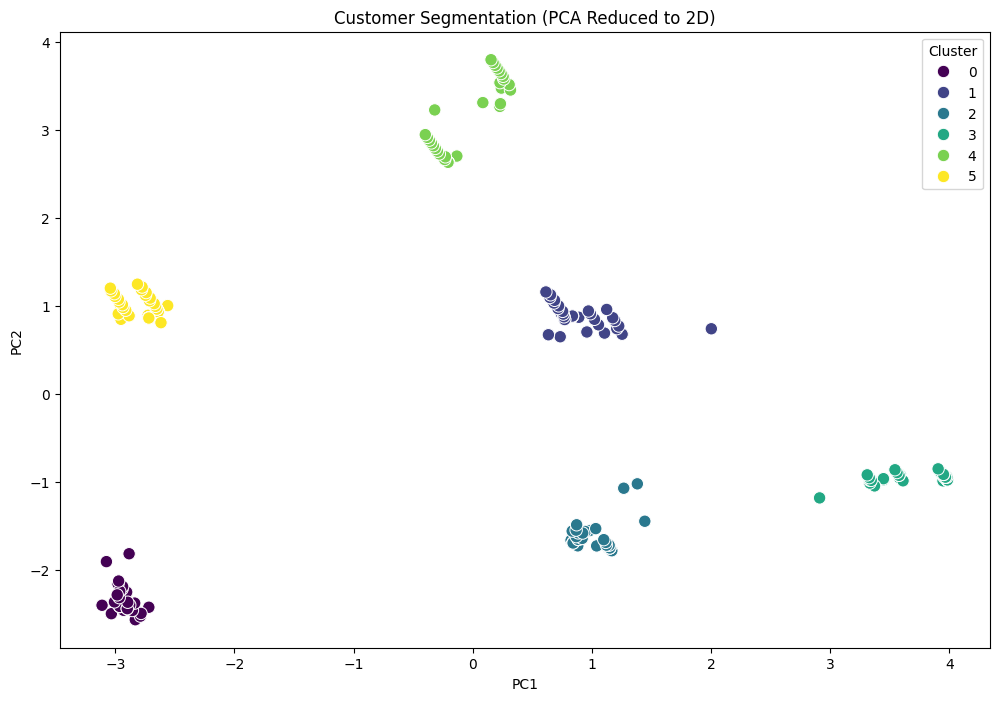

In [66]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_scaled['Cluster']

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=80)
plt.title("Customer Segmentation (PCA Reduced to 2D)")
plt.show()

Examine Cluster Characteristics

In [67]:
# Check the average profile for each cluster
cluster_profiles = df_encoded.groupby('Cluster').mean()
print(cluster_profiles)


               Age  Membership Type  Total Spend  Items Purchased  \
Cluster                                                             
0        36.706897              0.0   446.894828         7.568966   
1        30.711864              1.0  1165.035593        15.271186   
2        34.118644              2.0   805.491525        11.677966   
3        29.120690              1.0  1459.772414        20.000000   
4        28.948276              2.0   690.389655        11.637931   
5        42.017241              0.0   499.882759         9.413793   

         Average Rating  Discount Applied  Days Since Last Purchase  \
Cluster                                                               
0              3.193103               0.0                 22.758621   
1              4.544068               1.0                 24.593220   
2              4.172881               0.0                 15.271186   
3              4.808621               0.0                 11.172414   
4              3.9275

# Model evaluation

Various clustering evaluation methods

1.Silhouette Score-
Measures how similar each point is to its own cluster compared to other clusters.

  Values above 0.5 generally indicate good separation.

2.Inertia (Within-Cluster Sum of Squares)-Measures how tightly grouped the points in each cluster are.low is better(already did for elbow method)

3.Davies-Bouldin Index-Measures the average "similarity ratio" of each cluster.lower is better

In [69]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.8604


In [70]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster'])
print(f"Davies-Bouldin Index: {db_score:.4f}")

Davies-Bouldin Index: 0.2573


# Save the model

In [68]:
import pickle

# Save the trained model
with open("customer_segmentation_kmeans.pkl", "wb") as f:
    pickle.dump(kmeans_final, f)

# Cluster profiling


This step gives meaning to your clusters and helps stakeholders understand the customer groups. It involves:

1.Mean and Median Analysis

2.Frequency Counts

3.Comparing Clusters Across Key Features

In [71]:
# Get average feature values per cluster
cluster_profiles = df_encoded.groupby('Cluster').mean()

# Add count of members in each cluster
cluster_profiles['Count'] = df_encoded['Cluster'].value_counts()

# Sort by count for easier interpretation
cluster_profiles.sort_values(by='Count', ascending=False, inplace=True)

print(cluster_profiles)


               Age  Membership Type  Total Spend  Items Purchased  \
Cluster                                                             
1        30.711864              1.0  1165.035593        15.271186   
2        34.118644              2.0   805.491525        11.677966   
0        36.706897              0.0   446.894828         7.568966   
3        29.120690              1.0  1459.772414        20.000000   
4        28.948276              2.0   690.389655        11.637931   
5        42.017241              0.0   499.882759         9.413793   

         Average Rating  Discount Applied  Days Since Last Purchase  \
Cluster                                                               
1              4.544068               1.0                 24.593220   
2              4.172881               0.0                 15.271186   
0              3.193103               0.0                 22.758621   
3              4.808621               0.0                 11.172414   
4              3.9275

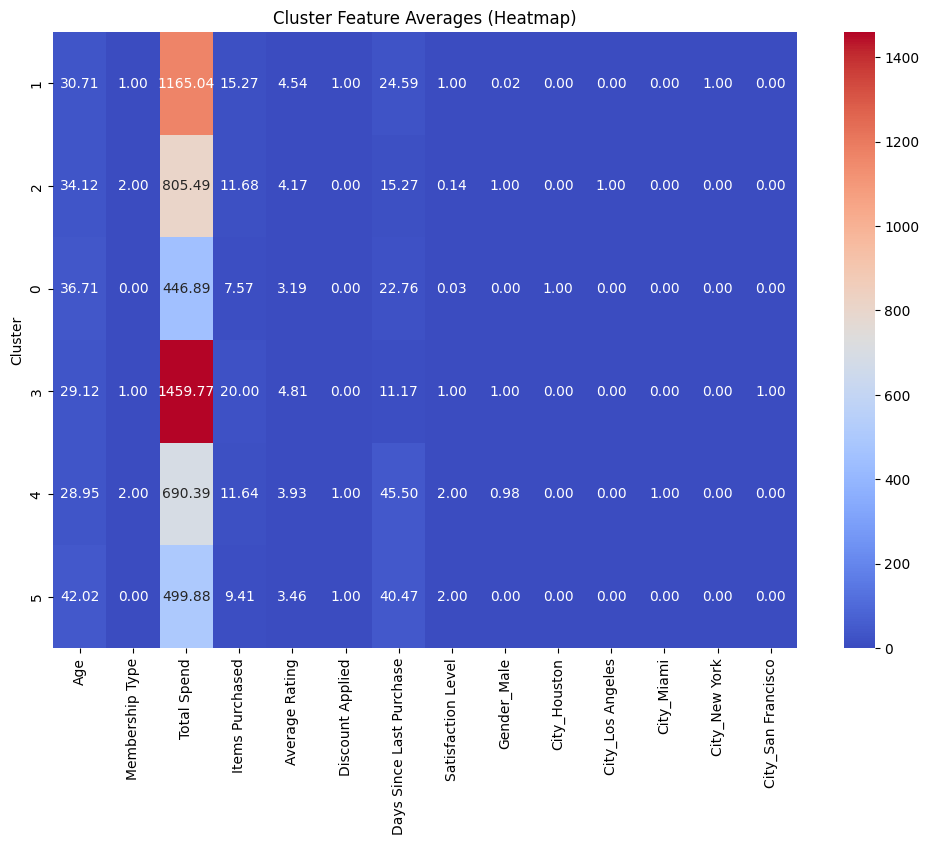

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profiles.drop('Count', axis=1), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cluster Feature Averages (Heatmap)")
plt.show()


<ipython-input-76-096755d97164>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Total Spend', data=df_encoded, palette='viridis')


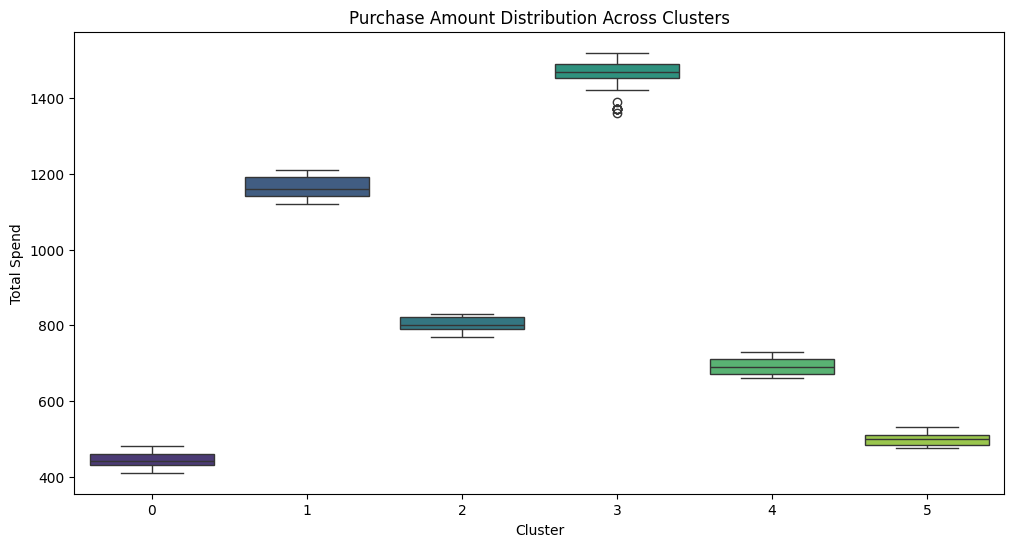

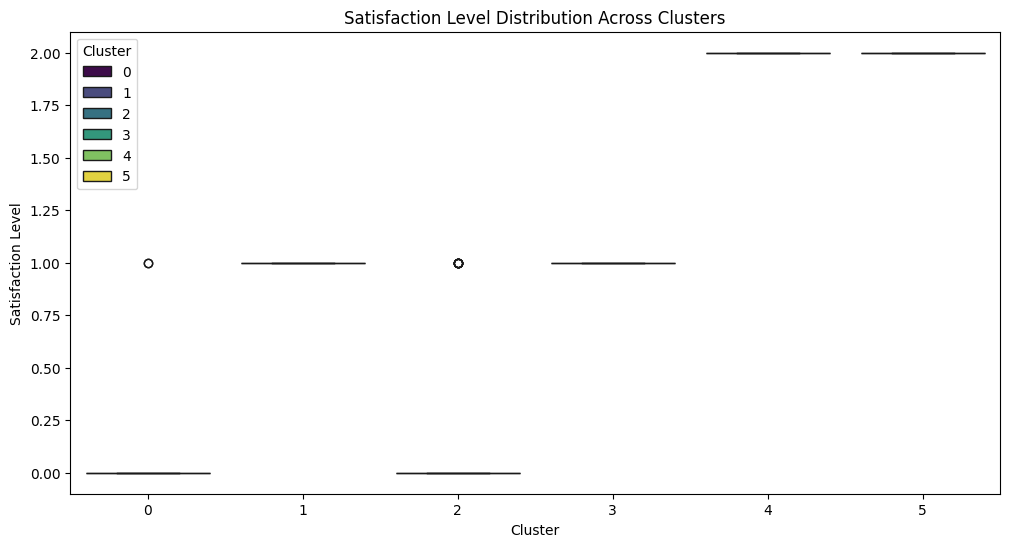

In [76]:
# Example for 'Purchase Amount' and 'Satisfaction Level'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Total Spend', data=df_encoded, palette='viridis')
plt.title('Purchase Amount Distribution Across Clusters')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Satisfaction Level', data=df_encoded, hue='Cluster',palette='viridis')
plt.title('Satisfaction Level Distribution Across Clusters')
plt.show()


END!!